In [9]:
from shared.color_schemes import plot_palette
from shared.color_schemes import GRUVBOX, EVERBLUSH, CATPPUCCIN_MACCHIATO, EVERFOREST, NORD, schemes

from scipy.spatial import KDTree

from typing import Literal


EXAMPLE_PALETTE_DARK = {
    "bg": (17, 19, 26),
    "fg": (198, 208, 245),
    "fg-dark": (122, 132, 120),
    "base": (48, 52, 70),
    "blue": (140, 170, 238),
    "red": (231, 130, 132),
    "green": (166, 209, 137),
    "yellow": (229, 200, 144),
    "shadow": (8, 9, 13),
    "glow": (226, 231, 250),
}
EXAMPLE_PALETTE_LIGHT = {
    "fg": (17, 19, 26),
    "fg-dark": (0, 0, 0),
    "bg": (198, 208, 245),
    "base": (48, 52, 70),
    "blue": (140, 170, 238),
    "red": (231, 130, 132),
    "green": (166, 209, 137),
    "yellow": (229, 200, 144),
    "shadow": (8, 9, 13),
    "glow": (226, 231, 250),
}

def generate_core_scheme(
    color_scheme: list[tuple[int, int, int]],
    example_palette: dict[str, tuple[int, int, int]] | None = None,
    mode: Literal["dark", "light"] = "dark",
    k: int = 2,
) -> dict[str, tuple[int, int, int]]:
    # create KDTree for querying
    tree = KDTree(color_scheme)

    output_scheme: dict[str, tuple[int, int, int]] = {}
    
    if example_palette is not None:
        template = example_palette
    else:
        match mode:
            case "dark":
                template = EXAMPLE_PALETTE_DARK
            case "light":
                template = EXAMPLE_PALETTE_LIGHT
    

    for name, color in template.items():
        _, idx = tree.query(color, k=2)

        for n, i in enumerate(idx):
            output_scheme[f"{name}{n + 1}"] = color_scheme[i]
    return output_scheme


def generate_css(color_dict, hex_output: bool = True):
    css_lines = [":vars {"]

    for key, value in color_dict.items():
        v = f"rgb{str(value)}" if not hex_output else "#" + "".join([hex(n)[2:] for n in value])
        css_lines.append(f"    --{key}: {v};")
    css_lines.append("    --shadow: mix(var(--bg1), #000000, 0.5);")
    css_lines.append("    --glow: lighter(var(--fg1));")
    css_lines.append("}")
    return "\n".join(css_lines)




:vars {
    --bg1: #141b1e;
    --bg2: #232a2d;
    --fg1: #dadada;
    --fg2: #eceff4;
    --fg-dark1: #7a8478;
    --fg-dark2: #859289;
    --base1: #2d353b;
    --base2: #343f44;
    --blue1: #71baf2;
    --blue2: #67b0e8;
    --red1: #e67e80;
    --red2: #ef7e7e;
    --green1: #96d988;
    --green2: #a7c080;
    --yellow1: #dbbc7f;
    --yellow2: #f4d67a;
    --shadow1: #141b1e;
    --shadow2: #232a2d;
    --glow1: #eceff4;
    --glow2: #dadada;
    --shadow: mix(var(--bg1), #000000, 0.5);
    --glow: lighter(var(--fg1));
}


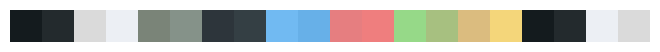

In [11]:
scheme = schemes['everblush']

newscheme = generate_core_scheme(scheme, mode="dark")
plot_palette([col for col in newscheme.values()])

print(
    generate_css(newscheme, True)
)

In [13]:
for name, color in newscheme.items():
    h = "".join([hex(v)[2:] for v in color])
    print(name, h)

bg1 141b1e
bg2 232a2d
fg1 dadada
fg2 eceff4
fg-dark1 7a8478
fg-dark2 859289
base1 2d353b
base2 343f44
blue1 71baf2
blue2 67b0e8
red1 e67e80
red2 ef7e7e
green1 96d988
green2 a7c080
yellow1 dbbc7f
yellow2 f4d67a
shadow1 141b1e
shadow2 232a2d
glow1 eceff4
glow2 dadada


: 